In [303]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

#defining functions for later us 
#calculates the r value and squared loss of a classifier/model
#takes four arguments, the chosen classifier and the splitted training set 
def calc_error_r(classi, X_train, X_test, y_train, y_test):
    #fit the classifier with the X and y trainings sets
    classi.fit(X_train, y_train)
    #try to predict the the values of y_test given the X_test as input data 
    y_test_predict = classi.predict(X_test)
    
    print("r square: ", format(r2_score(y_test, y_test_predict)))
    print("squared loss: ", format(mean_squared_error(y_test, y_test_predict)))

def calc_score(classi, X_train, X_test, y_train, y_test):
    classi.fit(X_train, y_train)
    print(classi.score(X_test, y_test))
    

In [319]:
#import data
data = pd.read_csv("datasets-35847-51854-Churn Modeling.csv")
#show the first 5 lines of data to see if the data has been loaded correctly 
print(data.head())

# preprocessing#################################################################################

#change string values to int## Male = 0, Female = 1, Germany = 0, Spain = 1, France = 2
#we replace every chosen feature value with the following syntax "feature": <int>
data["Gender"].replace({"Male": 0, "Female": 1}, inplace=True)
data["Geography"].replace({"Germany": 0, "Spain": 1, "France": 2}, inplace=True)

#Drop Data that is not relevant for the Data Analysis 
#the reasing of the features that are possibly important can be seen in the project report 
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)

#check if there are any missing values in the data 
#there is no missing data 

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          2       1   42       2       0.00              1   
1          608          1       1   41       1   83807.86              1   
2          502          2       1   42       8  159660.80              3   
4          850          1       1   43       2  125510.82              1   
5          645          1       0   44       8  113755.78              2   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
4          1               1         79084.10       0  
5          1               0        149756.71       1  


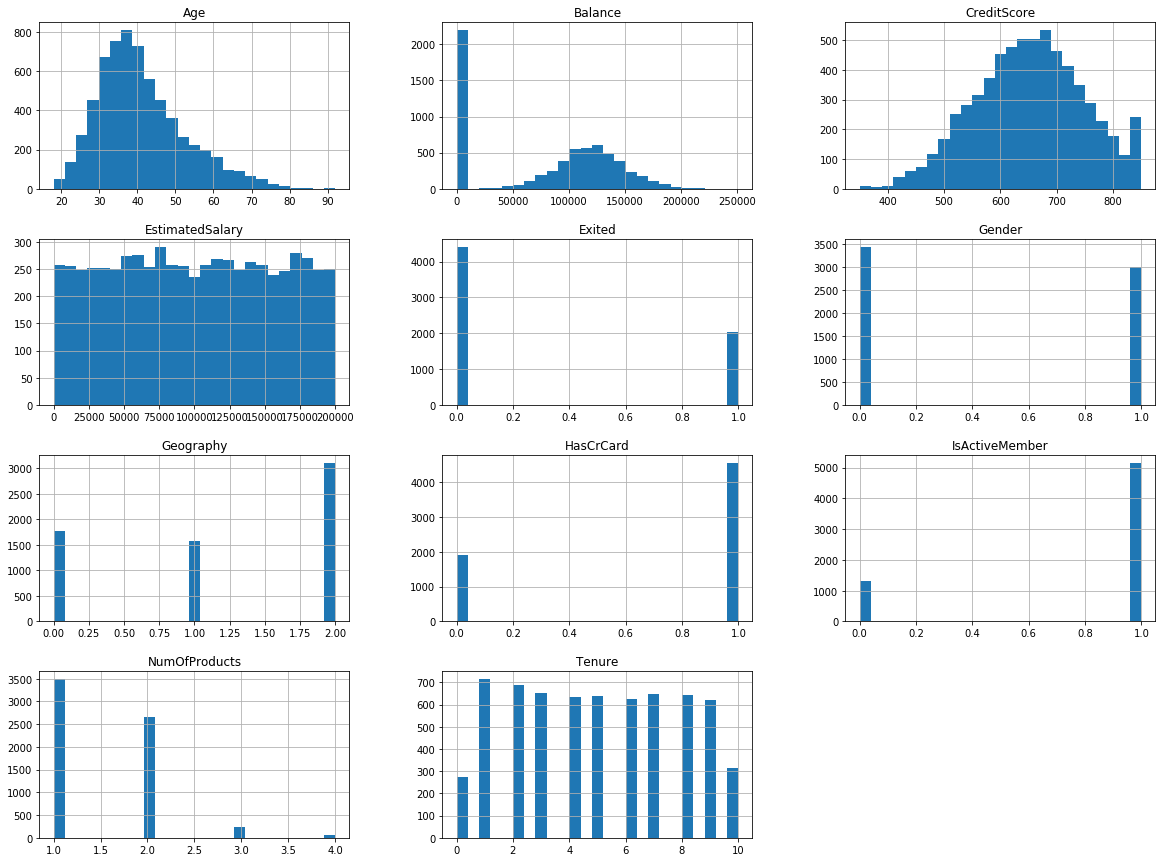

IsActiveMember     1.000000
Geography          0.126230
NumOfProducts      0.061003
CreditScore        0.031167
Tenure            -0.011135
EstimatedSalary   -0.017229
HasCrCard         -0.020459
Gender            -0.091248
Balance           -0.098204
Age               -0.177594
Exited            -0.740251
Name: IsActiveMember, dtype: float64


Exited             1.000000
Age                0.237419
Balance            0.133980
Gender             0.126425
EstimatedSalary    0.017867
Tenure            -0.003912
HasCrCard         -0.008751
CreditScore       -0.042515
NumOfProducts     -0.045527
Geography         -0.168395
IsActiveMember    -0.740251
Name: Exited, dtype: float64


In [320]:
# get all rows with Exited and IsActiveMember = 0
values = data[(data['Exited'] == 0) & (data['IsActiveMember'] == 0)].index
#Delete these row indexes from dataFrame
data.drop(values , inplace=True)
print(data.head())

#see correlations between features
#draw histrograms in order to see the distributions of the features 
data.hist(["CreditScore","Balance","Age","Tenure","EstimatedSalary","NumOfProducts", "Geography", "Gender", "HasCrCard", "IsActiveMember", "Exited"],bins=25, figsize=(20,15))
plt.show()

#look for correlations between the feature vectors
corr_matrix = data.corr()
print(corr_matrix["IsActiveMember"].sort_values(ascending=False))
print("\n")
print(corr_matrix["Exited"].sort_values(ascending=False))






In [306]:
#############################Prepare the data for testing and training set for Exited##############################################################
#take every data without the last column
X_Exited = data.iloc[:,:-1]
#take all positive correlated features
X_Exited_corr = data.iloc[:,[2,3,5,9]]


#PCA? We could apply PCA but the data is not really in the shape to reduce the dimensions. If we would do that the data
#possibly be falsified due to the high amount of outliers 

#last collumn 
y_Exited = data.iloc[:,-1].values

# Splitting the data into the Training set and Test set  
from sklearn.model_selection import train_test_split
X_train_Exited, X_test_Exited, y_train_Exited, y_test_Exited = train_test_split(X_Exited, y_Exited, test_size=0.2, random_state=10)
X_train_Exited_corr, X_test_Exited_corr, y_train_Exited_corr, y_test_Exited_corr = train_test_split(X_Exited_corr, y_Exited, test_size=0.2, random_state=10)

In [307]:
#############################Prepare the data for testing and training set for Balance_per_Tenure##############################################################


#take every data without the last column
X_Exited = data.iloc[:,:-1]
#take all positive correlated features
X_Exited_corr = data.iloc[:,[2,3,5,9]]


#PCA? We could apply PCA but the data is not really in the shape to reduce the dimensions. If we would do that the data
#possibly be falsified due to the high amount of outliers 

#last collumn 
y_Exited = data.iloc[:,-1].values

# Splitting the data into the Training set and Test set  
from sklearn.model_selection import train_test_split
X_train_Exited, X_test_Exited, y_train_Exited, y_test_Exited = train_test_split(X_Exited, y_Exited, test_size=0.2, random_state=10)
X_train_Exited_corr, X_test_Exited_corr, y_train_Exited_corr, y_test_Exited_corr = train_test_split(X_Exited_corr, y_Exited, test_size=0.2, random_state=10)

In [308]:
#########insert a value to see it someone left 
data["activeAndExited"] = np.absolute(data["IsActiveMember"] - data["Exited"])
data["activeAndExited"].replace({1: 0, 0: 1}, inplace=True)
#show correlations 
corr_matrix = data.corr()
print(corr_matrix["IsActiveMember"].sort_values(ascending=False))
print(data.head())


IsActiveMember     1.000000
activeAndExited    0.180253
Geography          0.126230
NumOfProducts      0.061003
CreditScore        0.031167
Tenure            -0.011135
EstimatedSalary   -0.017229
HasCrCard         -0.020459
Gender            -0.091248
Balance           -0.098204
Age               -0.177594
Exited            -0.740251
Name: IsActiveMember, dtype: float64
   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          2       1   42       2       0.00              1   
1          608          1       1   41       1   83807.86              1   
2          502          2       1   42       8  159660.80              3   
4          850          1       1   43       2  125510.82              1   
5          645          1       0   44       8  113755.78              2   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  activeAndExited  
0          1               1        101348.88       1                1  
1          0            

In [309]:
#############################Prepare the data for testing and training set for #IsActiveMember##############################
X_Active = data.iloc[:, [0,1,2,3,4,5,6,7,8,10]]
#take all positive correlated features
X_Active_corr = data.iloc[:,[0,1,3,6]]
y_Active = data.iloc[:,-3].values

# Splitting the data into the Training set and Test set  
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Ridge
lasso = linear_model.Lasso()

X_train_Active, X_test_Active, y_train_Active, y_test_Active = train_test_split(X_Active, y_Active, test_size=0.2, random_state=10)
X_train_Active_corr, X_test_Active_corr, y_train_Active_corr, y_test_Active_corr = train_test_split(X_Active_corr, y_Active, test_size=0.2, random_state=10)
#X_train_Active, X_test_Active, y_train_Active, y_test_Active = cross_validate(ridge, X_Active, y_Active, cv=5)

In [310]:
#import important libs
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# imputation Exited 
X_train_Exited = imputer.fit_transform(X_train_Exited)
X_test_Exited = imputer.transform(X_test_Exited)
# imputation Exited_corr
X_train_Exited_corr = imputer.fit_transform(X_train_Exited_corr)
X_test_Exited_corr = imputer.fit_transform(X_test_Exited_corr)
# imputation Active
X_train_Active = imputer.fit_transform(X_train_Active)
X_test_Active = imputer.transform(X_test_Active)
# imputation Active_corr
X_train_Active_corr = imputer.fit_transform(X_train_Active_corr)
X_test_Active_corr = imputer.fit_transform(X_test_Active_corr)


In [311]:
#import libs
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# we use robustscaler because it is robust to outliers
rc = RobustScaler()

# scaling Exited 
X_train_Exited = rc.fit_transform(X_train_Exited)
X_test_Exited = rc.transform(X_test_Exited)
# scaling Exited_corr
X_train_Exited_corr = rc.fit_transform(X_train_Exited_corr)
X_test_Exited_corr = rc.transform(X_test_Exited_corr)
# scaling Active
X_train_Active = rc.fit_transform(X_train_Active)
X_test_Active = rc.transform(X_test_Active)
# scaling Active
X_train_Active_corr = rc.fit_transform(X_train_Active_corr)
X_test_Active_corr = rc.transform(X_test_Active_corr)

In [312]:
#show correlations between features

from sklearn import preprocessing
X_corr = data.iloc[:,:]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_corr = min_max_scaler.fit_transform(X_corr)
X_corr = pd.DataFrame(x_scaled_corr)

#print(pd.DataFrame(X_corr).corr(method='pearson'))
#print("Exited: \n", pd.DataFrame(X_corr).corr(method='pearson')[10].sort_values(ascending=False))
#print("\n")
#print("IsActiveMember: \n", pd.DataFrame(X_corr).corr(method='pearson')[8].sort_values(ascending=False))



C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [313]:
#defining the models that are needed for the function
#logistic regression ###########################################################################################
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
clf_lg = LogisticRegression(random_state=0, multi_class='auto')#.fit(X_train_Exited, y_train_Exited)

#svm#####################################################################################################################
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train_Exited, y_train_Exited)
#ridge regression######################################################
#We use ridge regression in order in order to shrink features who are not important in a bigger way so that features
#who are important have a bigger impact on the end result
from sklearn.linear_model import Ridge
clf_ridge = Ridge(alpha=1.0)
clf_ridge.fit(X_train_Exited, y_train_Exited)

C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [314]:
#logistic regression##################################################
calc_error_r(clf_lg, X_train_Exited, X_test_Exited, y_train_Exited, y_test_Exited)
calc_error_r(clf_lg, X_train_Exited_corr, X_test_Exited_corr, y_train_Exited_corr, y_test_Exited_corr)

#svm#################################################################
calc_error_r(clf_svm, X_train_Exited, X_test_Exited, y_train_Exited, y_test_Exited)
calc_error_r(clf_svm, X_train_Exited_corr, X_test_Exited_corr, y_train_Exited_corr, y_test_Exited_corr)

#ridge regression#####################################################
calc_error_r(clf_ridge, X_train_Exited, X_test_Exited, y_train_Exited, y_test_Exited)
calc_error_r(clf_ridge, X_train_Exited_corr, X_test_Exited_corr, y_train_Exited_corr, y_test_Exited_corr)



C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r square:  0.47403542488508266
squared loss:  0.1123160340821069
r square:  -0.46907346842442443
squared loss:  0.313710302091402
r square:  0.5574642885240005
squared loss:  0.09450038729666925


C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r square:  -0.3130977668386212
squared loss:  0.2804027885360186
r square:  0.5699408966739792
squared loss:  0.09183609541751386
r square:  0.07741589142562233
squared loss:  0.19701134465112974


In [321]:
#######faster way##############
##############using cross validation#################################
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

print("cross validationc + ridge regression: ",cross_val_score(clf_ridge, X_train_Exited, y_train_Exited))
print("cross validationc + ridge regression + corr: ",cross_val_score(clf_ridge, X_train_Exited_corr, y_train_Exited_corr))
print("cross validation + SVM: ",cross_val_score(clf_svm, X_train_Exited, y_train_Exited))
print("cross validation + SVM: ",cross_val_score(clf_svm, X_train_Exited, y_train_Exited))
print("cross validation + randomforest: ",cross_val_score(RandomForestClassifier(n_estimators=40), X_train_Exited, y_train_Exited))

#or#######################without using cross validation####################################
print("ridge regression: ",calc_score(clf_ridge, X_train_Exited, X_test_Exited, y_train_Exited, y_test_Exited))
print("SVM, : ",calc_score(clf_svm, X_train_Exited, X_test_Exited, y_train_Exited, y_test_Exited))
print("randomforest: ", calc_score(RandomForestClassifier(n_estimators=40), X_train_Exited, X_test_Exited, y_train_Exited, y_test_Exited))

C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to accou

cross validationc + ridge regression:  [0.59092351 0.55391571 0.56188976]
cross validationc + ridge regression + corr:  [0.07760105 0.08629648 0.10022361]


C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


cross validation + SVM:  [0.89947705 0.90005811 0.89593023]


C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


cross validation + randomforest:  [0.90354445 0.90412551 0.9005814 ]
0.5699408966739792
ridge regression:  None


C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9054996127033308
SVM, :  None
0.9039504260263361
randomforest:  None
